In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import os
os.environ['X13PATH'] = '/home/brian/Documents/econ_data/micro/x13as/'

os.chdir('/home/brian/Documents/CPS/data/clean/')

from statsmodels.tsa.x13 import (_find_x12, x13_arima_select_order,
                                 x13_arima_analysis)

In [2]:
cols = ['AGE', 'YEAR', 'MONTH', 'SAMEEMP', 'CHJOBACT', 'BASICWGT', 'LFS']

df = pd.concat([pd.read_feather(f'cps{year}.ft', columns=cols)
                  .query('LFS == "Employed" and SAMEEMP in [0, 1]') 
                for year in range(1994, 2024)])

chjobact = (lambda x: x.query('SAMEEMP == 0').BASICWGT.sum()
                 / x.BASICWGT.sum())

data = (df.groupby(['YEAR', 'MONTH']).apply(chjobact)).reset_index()
data['DATE'] = pd.to_datetime(dict(year=data.YEAR, month=data.MONTH, day=1))
data = data.set_index('DATE').drop(['YEAR', 'MONTH'], axis=1) * 100

/home/brian/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/x13.py:203: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


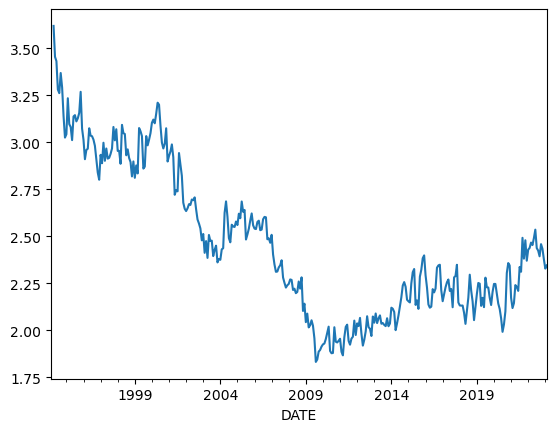

In [3]:
sm = x13_arima_analysis(data)
sm.seasadj.rolling(3).mean().plot();

In [7]:
sm.seasadj

DATE
1994-02-01    8.493884
1994-03-01    7.928707
1994-04-01    7.754398
1994-05-01    6.283365
1994-06-01    6.600224
                ...   
2021-08-01    4.135072
2021-09-01    5.069528
2021-10-01    4.603902
2021-11-01    4.868954
2021-12-01    4.688248
Name: seasadj, Length: 335, dtype: float64

<AxesSubplot:xlabel='DATE'>

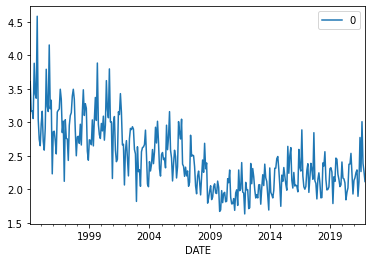

In [12]:
data.plot()